In [89]:
#example:
a=1
b=10
h1=1.8
x0=1
y0=2
xs=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ys=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
xr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
yr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ze=[0.,0.,0.]
zr=[0.,0.]

def det3(A):
    b=0
    b=A[0][0]*A[1][1]*A[2][2]+A[0][1]*A[1][2]*A[2][0]+A[0][2]*A[1][0]*A[2][1]-A[0][2]*A[1][1]*A[2][0]-A[0][0]*A[1][2]*A[2][1]-A[0][1]*A[1][0]*A[2][2]
    return b

def f(x,y):
    return y/2/x

def Eyler(x_0,y_0,xe,ye,h,a,b):
    x=0
    y=0
    x0=x_0
    y0=y_0
    i=0
    print("Eyler's method:")
    print("i      xi       yi")
    print("%.f %.8f %.8f" % (i, x0, y0))
    for i in range(1,int((b-a)/h)+1):
        x=x0+h
        y=y0+h*f(x0,y0)
        xe[i]=x
        ye[i]=y
        print("%.f %.8f %.8f" % (i, x, y)) 
        x0=x
        y0=y
        i+=1
    
    return xe,ye

def RK(x0,y0,xr,yr,h,a,b):
    K=[0.,0.,0.,0.]
    i=1
    print("Runge-Kutta:")
    print("i     x0         y0        K[0]       K[1]       K[2]      K[3]")
    for i in range(int((b-a)/h)):
        x=x0+h
        K[0]=f(x0,y0)
        K[1]=f(x0+h/2,y0+h/2*K[0])
        K[2]=f(x0+h/2,y0+h/2*K[1])
        K[3]=f(x0+h,y0+h*K[2])
        y=y0+h/6*(K[0]+2*K[1]+2*K[2]+K[3])
        xr[i]=x
        yr[i]=y
        print("%.f %.8f %.8f %.8f %.8f %.8f %.8f" % (i,x0, y0, K[0],K[1],K[2],K[3]))
        x0=x
        y0=y
        i+=1
    print("%.f %.8f %.8f " % (5, x, y))

def RR(z,h):
    zp=0
    if len(z)==3:
        A=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        B=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    A[i][j]=z[i]
                if j==1:
                    A[i][j]=h[i]
                if j==2:
                    A[i][j]=h[i]*h[i]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    B[i][j]=1
                else:
                    B[i][j]=A[i][j]
        zp=det3(A)/det3(B)
    if len(z)==2:
        zp=z[0]+(z[0]-z[1])/((h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])-1)
    print("Runge-Rombert")
    return zp

xs[0]=x0
ys[0]=y0
xr[0]=x0
yr[0]=y0
Eyler(x0,y0,xs,ys,h1,a,b)
ze[0]=ye[4]
RK(x0,y0,xr,yr,h1,a,b)
zr[0]=yr[4]


#print(RR(ze,h))
#print RR(zs,h)


Eyler's method:
i      xi       yi
0 1.00000000 2.00000000
1 2.80000000 3.80000000
2 4.60000000 5.02142857
3 6.40000000 6.00388199
4 8.20000000 6.84817789
5 10.00000000 7.59980717
Runge-Kutta:
i     x0         y0        K[0]       K[1]       K[2]      K[3]
0 1.00000000 2.00000000 1.00000000 0.76315789 0.70706371 0.58441334
1 2.80000000 3.35745696 0.59954589 0.52662814 0.51775977 0.46624180
2 4.60000000 4.30382602 0.46780718 0.42953204 0.42640044 0.39619897
3 6.40000000 5.07658735 0.39660839 0.37215992 0.37065283 0.35022942
4 8.20000000 5.74632635 0.35038575 0.33305898 0.33220217 0.31721451
5 10.00000000 6.34576312 


In [8]:
a=-8
b=-4
h=[1.,0.5,0.4]
x0=-8
y0=-2
xe=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ye=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
xr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
yr=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
ze=[0.,0.,0.]
zr=[0.,0.]
z=[0.,0.]

def det3(A):
    b=0
    b=A[0][0]*A[1][1]*A[2][2]+A[0][1]*A[1][2]*A[2][0]+A[0][2]*A[1][0]*A[2][1]-A[0][2]*A[1][1]*A[2][0]-A[0][0]*A[1][2]*A[2][1]-A[0][1]*A[1][0]*A[2][2]
    return b

def f(x,y):
    return -2*y-3*x*x-5

def Eyler(x_0,y_0,xe,ye,h,a,b,ze):
    x=0
    y=0
    x0=x_0
    y0=y_0
    i=0
    print("Eyler's method:")
    print("i      xi       yi")
    print("%.f %.8f %.8f" % (i, x0, y0))
    for i in range(1,int((b-a)/h)+1):
        x=x0+h
        y=y0+h*f(x0,y0)
        xe[i]=x
        ye[i]=y
        print("%.f %.8f %.8f" % (i, x, y)) 
        x0=x
        y0=y
        i+=1
    for j in range(0,3):
        if ze[j]==0:
            if j==0:
                ze[j]=ye[4]
            if j==1:
                ze[j]=ye[8]
            if j==2:
                ze[j]=ye[10]
    return xe,ye

def RK(x0,y0,xr,yr,h,a,b,zr):
    K=[0.,0.,0.,0.]
    i=1
    print("Runge-Kutta:")
    print("i     x0           y0          K[0]         K[1]         K[2]      K[3]")
    xr[1]=x0
    yr[1]=y0
    for i in range(int((b-a)/h)):
        x=x0+h
        K[0]=f(x0,y0)
        K[1]=f(x0+h/2,y0+h/2*K[0])
        K[2]=f(x0+h/2,y0+h/2*K[1])
        K[3]=f(x0+h,y0+h*K[2])
        y=y0+h/6*(K[0]+2*K[1]+2*K[2]+K[3])
        xr[i+1]=x
        yr[i+1]=y
        print("%.f %.8f %.8f %.8f %.8f %.8f %.8f" % (i,x0, y0, K[0],K[1],K[2],K[3]))
        x0=x
        y0=y
        i+=1
    print("%.f %.8f %.8f " % (5, x, y))
    for j in range(0,2):
        if zr[j]==0:
            if j==0:
                zr[j]=yr[4]
            if j==1:
                zr[j]=yr[8]
    return xr,yr

def RR(z,h):
    zp=0
    if len(z)==3:
        print("Runge:")
        A=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        B=[[0.,0.,0.],
          [0.,0.,0.],
          [0.,0.,0.]]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    A[i][j]=z[i]
                if j==1:
                    A[i][j]=h[i]
                if j==2:
                    A[i][j]=h[i]*h[i]
        for i in range(0,3):
            for j in range(0,3):
                if j==0:
                    B[i][j]=1
                else:
                    B[i][j]=A[i][j]
        zp=det3(A)/det3(B)
    if len(z)==2:
        zp=z[0]+(z[0]-z[1])/((h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])*(h[1]/h[0])-1)
        print("Runge-Rombert")
    return zp


for i in range(0,3):
    xe[0]=x0
    ye[0]=y0
    xr[0]=x0
    yr[0]=y0
    Eyler(x0,y0,xe,ye,h[i],a,b,ze)
    if i!=2:
        RK(x0,y0,xr,yr,h[i],a,b,zr)
print RR(ze,h)
print RR(zr,h)


Eyler's method:
i      xi       yi
0 -8.00000000 -2.00000000
1 -7.00000000 -195.00000000
2 -6.00000000 43.00000000
3 -5.00000000 -156.00000000
4 -4.00000000 76.00000000
Runge-Kutta:
i     x0           y0          K[0]         K[1]         K[2]      K[3]
0 -8.00000000 -2.00000000 -193.00000000 23.25000000 -193.00000000 238.00000000
1 -7.00000000 -51.08333333 -49.83333333 20.25000000 -49.83333333 88.83333333
2 -6.00000000 -54.44444444 -4.11111111 17.25000000 -4.11111111 37.11111111
3 -5.00000000 -44.56481481 9.12962963 14.25000000 9.12962963 17.87037037
5 -4.00000000 -32.27160494 
Eyler's method:
i      xi       yi
0 -8.00000000 -2.00000000
1 -7.50000000 -98.50000000
2 -7.00000000 -86.87500000
3 -6.50000000 -76.00000000
4 -6.00000000 -65.87500000
5 -5.50000000 -56.50000000
6 -5.00000000 -47.87500000
7 -4.50000000 -40.00000000
8 -4.00000000 -32.87500000
Runge-Kutta:
i     x0           y0          K[0]         K[1]         K[2]      K[3]
0 -8.00000000 -2.00000000 -193.00000000 -84.68750000

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r=np.linspace(-8,-4,11)
fig=plt.figure()
#plt.plot(r,437/np.exp(2*r)/4/np.exp(16)-13/4-3/2*r*r+3/2*r)
xa=np.linspace(-8,-4,21)
ya=[-2,-33,-52.2,-63.6,-69.8,-72.5,-72.9,-71.8,-69.8,-67.2,-64.2,-61.1,-57.8,-54.5,-51.2,-48,-44.8,-41.8,-38.8,-36,-33.2]
plt.plot(xa,ya)
plt.plot(r, ye, linestyle=':',linewidth=3)


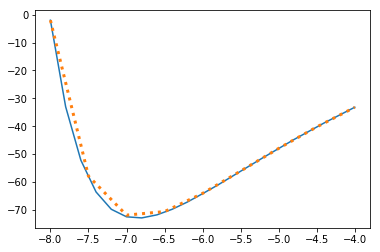

In [3]:
r=np.linspace(-8,-4,9)
print 
fig=plt.figure()
xa=np.linspace(-8,-4,21)
ya=[-2,-33,-52.2,-63.6,-69.8,-72.5,-72.9,-71.8,-69.8,-67.2,-64.2,-61.1,-57.8,-54.5,-51.2,-48,-44.8,-41.8,-38.8,-36,-33.2]
plt.plot(xa,ya)
plt.plot(r, [yr[0],yr[1],yr[2],yr[3],yr[4],yr[5],yr[6],yr[7],yr[8]],linestyle=':',linewidth=3)